#  DAY5中間発表

#### =========================================================================================

###    1.タイトル：形状や生息地等の特性からキノコが食用か有毒かを識別する
###    2.氏名：豊田
###    3.課題：kaggle2『Mushroom Classification』

####   ●kaggle　https://www.kaggle.com/uciml/mushroom-classification/data
####   ●関連サイト https://edu.deepanalytics.jp/datasets/19     https://archive.ics.uci.edu/ml/datasets/Mushroom

![mr.png](attachment:mr.png)

<img src="https://github.com/glanzend/skillupai/blob/master/mr.jpg">

#### =========================================================================================

###    4(1)目的変数と説明変数の関係を確認するためのグラフ。また、そのグラフからわかることを文章で。
###    4(2)欠測値と異常値を確認した結果。また、欠測値や異常値をが存在する場合は、その処理方法。

#### 4.1データセットの読み込み

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyper
import seaborn as sns
import statsmodels.api as sm #線形回帰分析と同時にAICを計算
import itertools #組み合わせを求める
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split #トレーニングデータとテストデータに分ける
from sklearn.preprocessing import StandardScaler #データの標準化
from sklearn.model_selection import KFold #交差検証
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #回帰分析
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score #予測結果の識別率を算出

#CSVファイル読み込み
df_csv =pd.read_csv('mushrooms.csv')
display(df_csv)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


#### 4.2目的変数(class)と説明変数の関係
######  ＜サマリー＞
######  ●クロス集計結果
######  ・変数stalk-root（柄の根）”に”？”が2480個(e/食用キノコ: 720 p/毒キノコ:1760)含まれている
######  ・変数”veil-type”は”P(つぼの種類=内皮膜)”のみであることを確認(e/食用キノコ:4208 p/毒キノコ:3916)。
######  ・全変数（カラム）のデータ数（行数）は8124であり、NaNは含まれていない。
######  
######   ●棒グラフ結果（目視）
######     3cap-surface(傘表面),5bruises(斑点),6odor(臭気),8gill-spacing(ひだの間隔),9gill-size(ひだのサイズ),10gill-color(ひだの色),
######     12stalk-root(柄の根),13stalk-surface-above-ring(柄-表面上のリング),15stalk-color-above-ring(柄の色-上リング),
######     16stalk-color-below-ring(柄の色-下リング),20ring-type(つばの種類),21spore-print-color(胞子の色),22population(集団形成方法)

######    
######    以下、詳細
######  ・e/食用キノコと関係のありそうな変数 
######      cap-surface_f,bruises_f,odor_a,odor_l,odor_n,gill-spacing_w,gill-size_b,gill-color_n,gill-color_w,stalk-root_c,stalk-root_e,stalk-root_r,
######      stalk-surface-above-ring_s,stalk-color-above-ring_w,ring-type_p,spore-print-color_n
######  ・p/毒キノコと関係のありそうな変数　
######     bruises_t,odor_f,gill-size_n,gill-color_b,stalk-root_?,stalk-surface-above-ring_k,stalk-color-below-ring_k,stalk-color-above-ring_p,
######      stalk-color-below-ring_p,ring-type_I ,spore-print-color_w, population_v         

cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


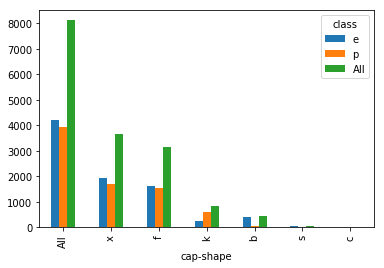

cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


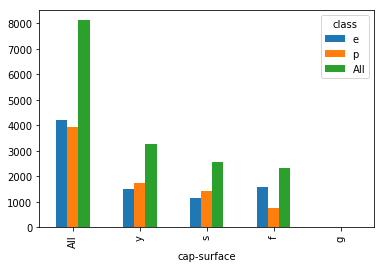

cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


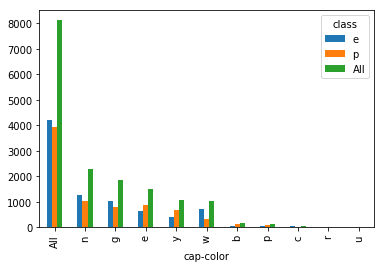

bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


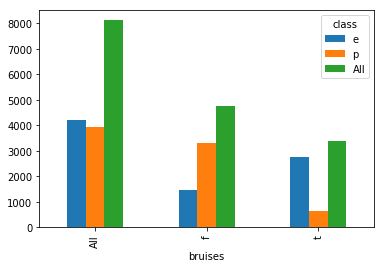

odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


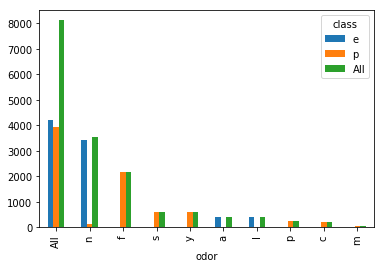

gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


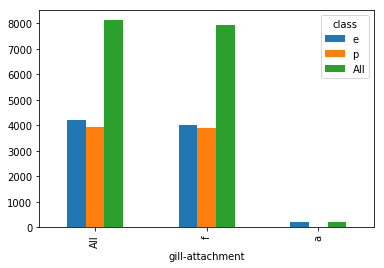

gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


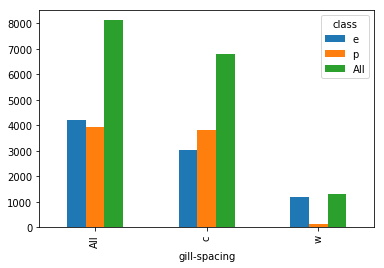

gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


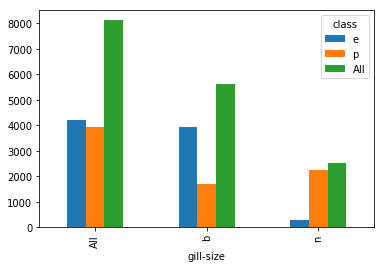

gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


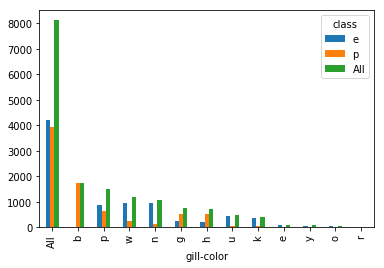

stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


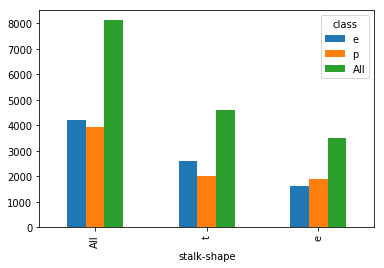

stalk-root,?,b,c,e,r,All
class,,,,,,
e,720,1920,512,864,192,4208
p,1760,1856,44,256,0,3916
All,2480,3776,556,1120,192,8124


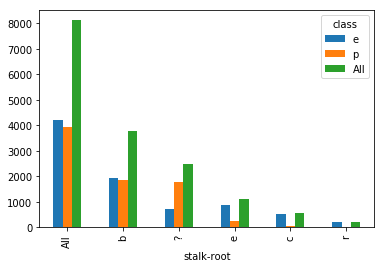

stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


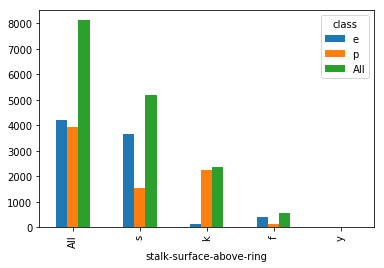

stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


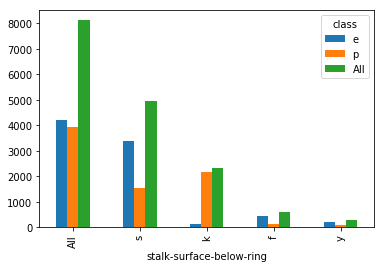

stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


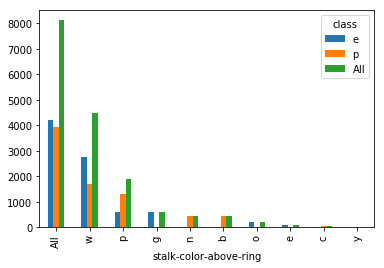

stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


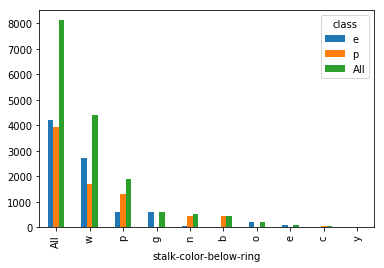

veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


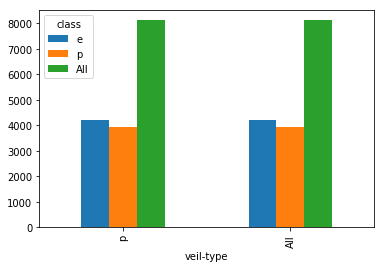

veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


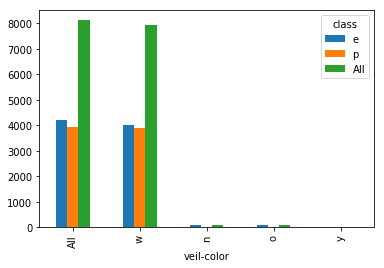

ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


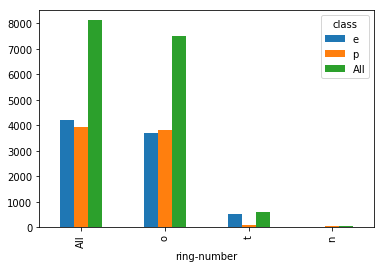

ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


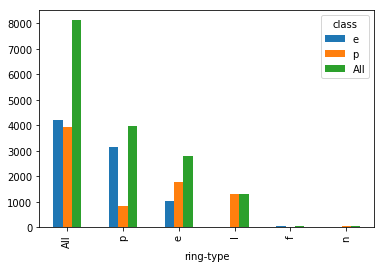

spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


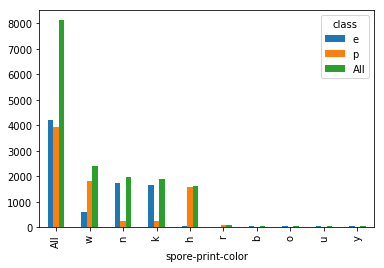

population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


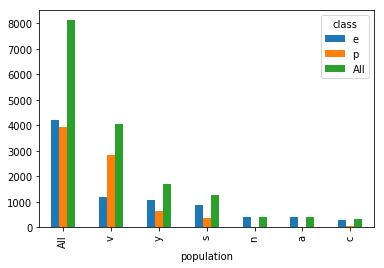

habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


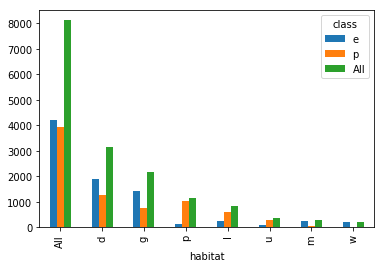

In [221]:
for col in df_csv.columns:
    if col=="class":
        continue

    df_cross = pd.crosstab(index=[df_csv["class"]], columns=df_csv[col],margins=True)
    display(df_cross)
    df_cross_show = df_cross.T.sort_values(by=['All'], ascending=False)
    df_cross_show.plot.bar()
    plt.show()

#### 4.3欠測値の確認

In [227]:
pd.DataFrame(df_csv.isnull().sum(), columns=["num of missing"])

,num of missing
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


上記集計では欠測値NaNは確認されず

#### 4.4データの前処理

#### 4.4.1データ置換

In [210]:
#stalk-root”の”？”を”nan”に置換
df_csv_rep = df_csv.replace('?', 'n')
#display(df_csv_rep)

for col in df_csv_rep.columns:
    if col=="class":
        continue

    df_cross = pd.crosstab(index=[df_csv_rep["class"]], columns=df_csv_rep[col],margins=True)
    display(df_cross)

cap-shape,b,c,f,k,s,x,All
class,,,,,,,
e,404,0,1596,228,32,1948,4208
p,48,4,1556,600,0,1708,3916
All,452,4,3152,828,32,3656,8124


cap-surface,f,g,s,y,All
class,,,,,
e,1560,0,1144,1504,4208
p,760,4,1412,1740,3916
All,2320,4,2556,3244,8124


cap-color,b,c,e,g,n,p,r,u,w,y,All
class,,,,,,,,,,,
e,48,32,624,1032,1264,56,16,16,720,400,4208
p,120,12,876,808,1020,88,0,0,320,672,3916
All,168,44,1500,1840,2284,144,16,16,1040,1072,8124


bruises,f,t,All
class,,,
e,1456,2752,4208
p,3292,624,3916
All,4748,3376,8124


odor,a,c,f,l,m,n,p,s,y,All
class,,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0,4208
p,0,192,2160,0,36,120,256,576,576,3916
All,400,192,2160,400,36,3528,256,576,576,8124


gill-attachment,a,f,All
class,,,
e,192,4016,4208
p,18,3898,3916
All,210,7914,8124


gill-spacing,c,w,All
class,,,
e,3008,1200,4208
p,3804,112,3916
All,6812,1312,8124


gill-size,b,n,All
class,,,
e,3920,288,4208
p,1692,2224,3916
All,5612,2512,8124


gill-color,b,e,g,h,k,n,o,p,r,u,w,y,All
class,,,,,,,,,,,,,
e,0,96,248,204,344,936,64,852,0,444,956,64,4208
p,1728,0,504,528,64,112,0,640,24,48,246,22,3916
All,1728,96,752,732,408,1048,64,1492,24,492,1202,86,8124


stalk-shape,e,t,All
class,,,
e,1616,2592,4208
p,1900,2016,3916
All,3516,4608,8124


stalk-root,b,c,e,n,r,All
class,,,,,,
e,1920,512,864,720,192,4208
p,1856,44,256,1760,0,3916
All,3776,556,1120,2480,192,8124


stalk-surface-above-ring,f,k,s,y,All
class,,,,,
e,408,144,3640,16,4208
p,144,2228,1536,8,3916
All,552,2372,5176,24,8124


stalk-surface-below-ring,f,k,s,y,All
class,,,,,
e,456,144,3400,208,4208
p,144,2160,1536,76,3916
All,600,2304,4936,284,8124


stalk-color-above-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,16,192,576,2752,0,4208
p,432,36,0,0,432,0,1296,1712,8,3916
All,432,36,96,576,448,192,1872,4464,8,8124


stalk-color-below-ring,b,c,e,g,n,o,p,w,y,All
class,,,,,,,,,,
e,0,0,96,576,64,192,576,2704,0,4208
p,432,36,0,0,448,0,1296,1680,24,3916
All,432,36,96,576,512,192,1872,4384,24,8124


veil-type,p,All
class,,
e,4208,4208
p,3916,3916
All,8124,8124


veil-color,n,o,w,y,All
class,,,,,
e,96,96,4016,0,4208
p,0,0,3908,8,3916
All,96,96,7924,8,8124


ring-number,n,o,t,All
class,,,,
e,0,3680,528,4208
p,36,3808,72,3916
All,36,7488,600,8124


ring-type,e,f,l,n,p,All
class,,,,,,
e,1008,48,0,0,3152,4208
p,1768,0,1296,36,816,3916
All,2776,48,1296,36,3968,8124


spore-print-color,b,h,k,n,o,r,u,w,y,All
class,,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48,4208
p,0,1584,224,224,0,72,0,1812,0,3916
All,48,1632,1872,1968,48,72,48,2388,48,8124


population,a,c,n,s,v,y,All
class,,,,,,,
e,384,288,400,880,1192,1064,4208
p,0,52,0,368,2848,648,3916
All,384,340,400,1248,4040,1712,8124


habitat,d,g,l,m,p,u,w,All
class,,,,,,,,
e,1880,1408,240,256,136,96,192,4208
p,1268,740,592,36,1008,272,0,3916
All,3148,2148,832,292,1144,368,192,8124


#### 4.4.2質的変数をダミー変数に変換

In [220]:
use_col =['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat']

dum_mushrooms = pd.get_dummies(df_csv_rep[use_col]) 
display(dum_mushrooms.head())
display(dum_mushrooms.tail())
np.savetxt('dum_mushrooms_2.csv',dum_mushrooms, delimiter=',')

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8123,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [225]:
#ダミー変数変換後のデータセットキーの確認
print(dum_mushrooms.keys())

Index(['class_e', 'class_p', 'cap-shape_b', 'cap-shape_c', 'cap-shape_f',
       'cap-shape_k', 'cap-shape_s', 'cap-shape_x', 'cap-surface_f',
       'cap-surface_g',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=118)


### 5.目的変数を説明するのに有効そうな説明変数。また、それらが有効だと考えた理由を文章で。

### 6.使えそうなアルゴリズムの候補